# load model

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
model = torchvision.models.segmentation.fcn_resnet50(
    num_classes=1,
    weights_backbone=torchvision.models.ResNet50_Weights.IMAGENET1K_V2
)
model.load_state_dict(torch.load('my_model.pth'))

<All keys matched successfully>

In [4]:
model.to(device)

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [5]:
data_set = torchvision.datasets.ImageFolder('./data/')

In [6]:
img_transforms = torchvision.transforms.Compose([
    torchvision.transforms.PILToTensor(),
    torchvision.transforms.Resize((1280, 720)),
    torchvision.transforms.ConvertImageDtype(torch.float),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [14]:
class ImgDatasetDetect(torch.utils.data.Dataset):
    def __init__(self, data_set, img_transforms):
        super(ImgDatasetDetect, self).__init__()
        self.data_set = data_set
        self.img_transforms = img_transforms

    def __getitem__(self, index):
        img = self.data_set[index][0]
        size = self.data_set[index][0].size
        img = self.img_transforms(img)

        return img, size

    def __len__(self):
        return len(self.data_set)

In [16]:
data = ImgDatasetDetect(data_set, img_transforms)

In [9]:
dataloader =  torch.utils.data.DataLoader(data, 1, shuffle=False)

In [10]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
import pylab

In [11]:
def img_sampl(data):
  data = data > 0.5
  data = data * 1
  data = data.float()
  return data

In [ ]:
def test(model, test_loader, id_img=None):
    for id, data in enumerate(tqdm(test_loader)):
        if id_img != None:
            if id not in id_img:
              continue
        inputs= data
        inputs = inputs.to(device)

        trans_RGB = torchvision.transforms.ToPILImage('RGB')
        trans_L = torchvision.transforms.ToPILImage('L')

        out = model(inputs)

        fig, ax = plt.subplots(ncols=2)
        ax[0].set_title('input image')
        ax[0].axis('off')
        ax[0].imshow(trans_RGB(inputs.to('cpu')[0]))

        ax[1].set_title('output image')
        ax[1].axis('off')
        ax[1].imshow(trans_L(img_sampl(out['out']).to('cpu')[0]))

        fig.show()

  0%|          | 0/400 [00:00<?, ?it/s]C:\Users\Filic\AppData\Local\Temp\ipykernel_21076\1126729111.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
100%|██████████| 400/400 [00:22<00:00, 17.82it/s]


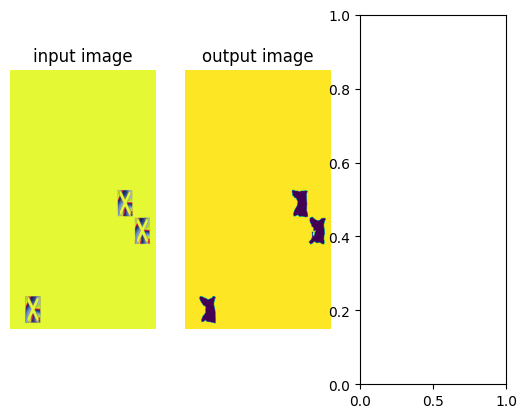

In [13]:
test(model, dataloader, [1])